In [1]:
import numpy as np
import pandas as pd
import time
import random
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#take as input the minimum change in each value and the maximum
minimum_noise = (int(input("What minimum percentage noise would you like? ")))
maximum_noise = (int(input("What maximum percentage of noise would you like? ")))

What minimum percentage noise would you like? 0
What maximum percentage of noise would you like? 10


In [3]:
#key is the original data, template has the same structure (meaning same rows, but more columns) but has no data yet
key = pd.read_csv("FPMK_key.csv")
template = pd.read_csv("fpmk_template.csv")

In [4]:
def simulate_transcriptome_1(df1, df2):
    """Takes as input the template (first), and the key (second) dataframes"""
    results=[]
    #sets the max index we will access, need to subtract 1 because we index from zero
    l = df2.shape[1] -1
    #this is the function that is used to assign new values to the template
    def assign_value(item):
        #chooses random index from useful range of key
        random_num = random.randint(2, l)
        #selects value from key
        random_val = key_tup[random_num]
        #chooses value in range defined by noise
        random_noise = random.randint(minimum_noise, maximum_noise)
        #generates a random value so we can randomly either increase or decrease the value
        random_branch = random.random()
        if random_branch>0.5:
            positive_noise= 1 + (random_noise/100)
            item = random_val*positive_noise
        else:
            negative_noise = 1 - (random_noise/100)
            item = random_val * negative_noise
        return item
    #adds headers to results list
    results.append(tuple(list(df1)))
    #iterates over every row in template dataframe
    for row in df1.itertuples():
        row_list=[]
        row_list = list(row)
        row_num = int(row[0])
        #selects values from corresponding row in key
        key_tup=df2.iloc[row_num]
        #list comprehension for each row in template
        row_list = row_list[1:3] + [assign_value(i) for i in row_list[3:]]
        #changes each list to tuple to make dataframe creation easier
        row_tuple=tuple(row_list)
        results.append(row_tuple)
    results = pd.DataFrame(results)
    return results

In [5]:
start=time.time()
results = simulate_transcriptome_1(template, key)
end=time.time()
print(end-start)

369.5670700073242


In [6]:
results.to_csv("results.csv", index=False, header=False)

In [7]:
def t_test_df(df1, df2):
    results=[]
    names = list(df1.columns.values.tolist())
    names.append('p_value')
    names = tuple(names)
    results.append(names)
    for row in df1.itertuples():
        row_list=[]
        row_list=list(row[1:])
        row_num=int(row[0])
        key_tup=df2.iloc[row_num]
        t_test_results=scipy.stats.ttest_ind(key_tup[2:], row_list[2:], equal_var=False)
        row_list.append(t_test_results[1])
        row_tuple=tuple(row_list)
        results.append(row_tuple)
    results=pd.DataFrame(results)
    return results

In [8]:
results=pd.read_csv("results.csv")
start=time.time()
t_test=t_test_df(results, key)
end=time.time()
print(end-start)
t_test.to_csv("p_value", header=False, index=False)

54.44946312904358


In [9]:
t_test=pd.read_csv("p_value")
t_test.set_index('Symbol', inplace=True)

In [10]:
t_test['p_value'].describe()

count    41622.000000
mean         0.911559
std          0.066157
min          0.505050
25%          0.871332
50%          0.924582
75%          0.964847
max          1.000000
Name: p_value, dtype: float64

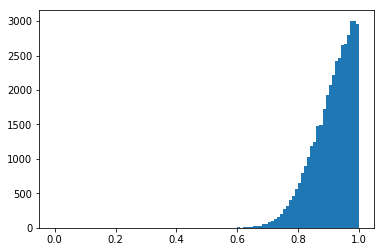

In [14]:
plot  = plt.hist(t_test['p_value'], bins=100, range = {0,1})
